##PW-4

#Topic: Market Basket Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules, apriori

In [ ]:
url = 'https://raw.githubusercontent.com/Arbazbms/6th_sem/main/project-work-4/bread_basket.csv'
# data = pd.read_csv('bread_basket.csv')
data = pd.read_csv(url)
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [ ]:
num_transactions = data['Transaction'].unique().shape[0]
num_transactions

9465

In [ ]:
unique_items = data['Item'].unique()
num_items = unique_items.shape[0]
print(num_items)
unique_items.reshape(num_items,1)

94


array([['Bread'],
       ['Scandinavian'],
       ['Hot chocolate'],
       ['Jam'],
       ['Cookies'],
       ['Muffin'],
       ['Coffee'],
       ['Pastry'],
       ['Medialuna'],
       ['Tea'],
       ['Tartine'],
       ['Basket'],
       ['Mineral water'],
       ['Farm House'],
       ['Fudge'],
       ['Juice'],
       ["Ella's Kitchen Pouches"],
       ['Victorian Sponge'],
       ['Frittata'],
       ['Hearty & Seasonal'],
       ['Soup'],
       ['Pick and Mix Bowls'],
       ['Smoothies'],
       ['Cake'],
       ['Mighty Protein'],
       ['Chicken sand'],
       ['Coke'],
       ['My-5 Fruit Shoot'],
       ['Focaccia'],
       ['Sandwich'],
       ['Alfajores'],
       ['Eggs'],
       ['Brownie'],
       ['Dulce de Leche'],
       ['Honey'],
       ['The BART'],
       ['Granola'],
       ['Fairy Doors'],
       ['Empanadas'],
       ['Keeping It Local'],
       ['Art Tray'],
       ['Bowl Nic Pitt'],
       ['Bread Pudding'],
       ['Adjustment'],
       ['Truffles'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [ ]:
data['date_time'] = pd.to_datetime(data['date_time'])
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


#Data Preprocessing

In [ ]:
data['date'] = data['date_time'].dt.date
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

# Extracting time
data['time'] = data['date_time'].dt.time

# Extracting month and replacing it with text
data['month'] = data['date_time'].dt.month
data['month'] = data['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

# Extracting hour
data['hour'] = data['date_time'].dt.hour
# Replacing hours with text
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
data['hour'] = data['hour'].replace(hour_in_num, hour_in_obj)

# Extracting weekday and replacing it with text
data['weekday'] = data['date_time'].dt.weekday
data['weekday'] = data['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

# dropping date_time column
data.drop('date_time', axis = 1, inplace = True)

data['Item'] = data['Item'].str.strip()
data['Item'] = data['Item'].str.lower()

data.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


#Data Visualization

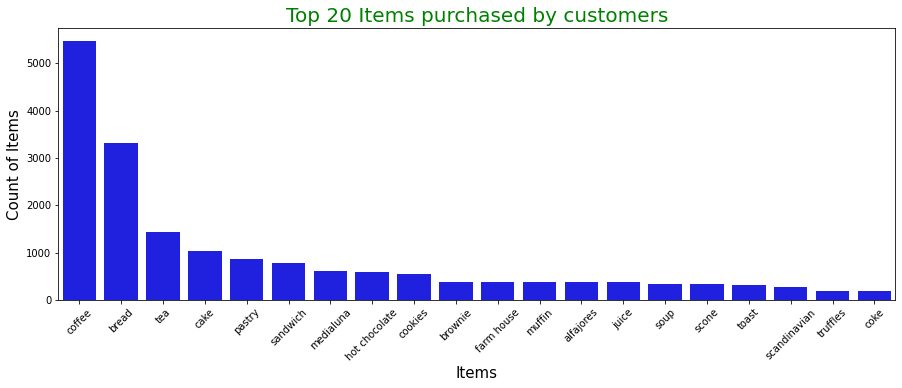

In [ ]:
# top purchased items

plt.figure(figsize=(15,5))
sns.barplot(x = data.Item.value_counts().head(20).index, y = data.Item.value_counts().head(20).values, color='blue')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

In [ ]:
data.groupby('month')['Transaction'].count().reset_index()

,month,Transaction
0,April,1048
1,August,700
2,December,2647
3,February,2748
4,January,3027
5,July,741
6,June,739
7,March,3220
8,May,924
9,November,3076


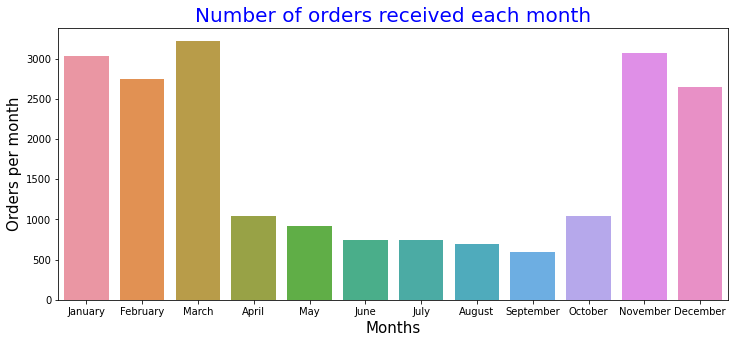

In [ ]:
# monthly transaction

monthTran = data.groupby('month')['Transaction'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("monthorder",inplace=True)


plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'blue', size = 20)
plt.show()

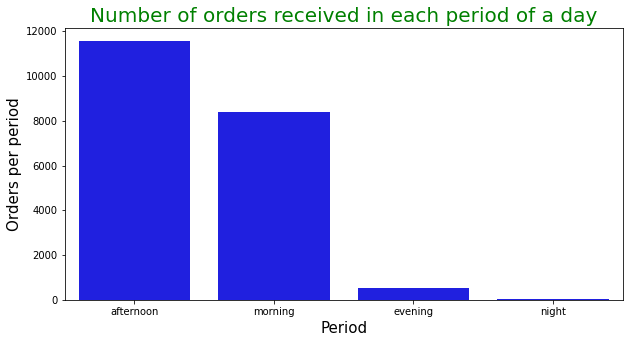

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = data.period_day.value_counts().index, y = data.period_day.value_counts().values, color='blue')
plt.xlabel('Period', size = 15)
plt.ylabel('Orders per period', size = 15)
plt.title('Number of orders received in each period of a day', color = 'green', size = 20)
plt.show()

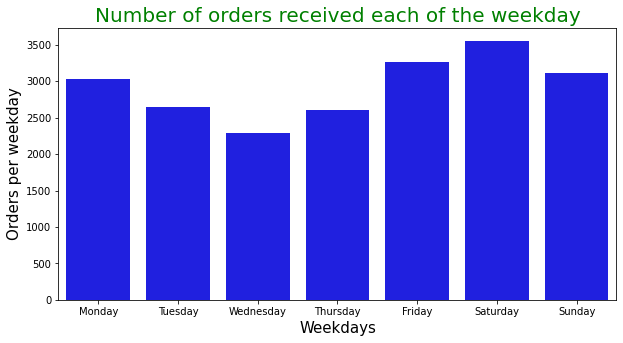

In [ ]:
weekTran = data.groupby('weekday')['Transaction'].count().reset_index()
weekTran.loc[:,"weekorder"] = [5,1,6,7,4,2,3]
weekTran.sort_values("weekorder",inplace=True)


plt.figure(figsize=(10,5))
sns.barplot(data = weekTran, x = "weekday", y = "Transaction", color='blue')
plt.xlabel('Weekdays', size = 15)
plt.ylabel('Orders per weekday', size = 15)
plt.title('Number of orders received each of the weekday', color = 'green', size = 20)
plt.show()

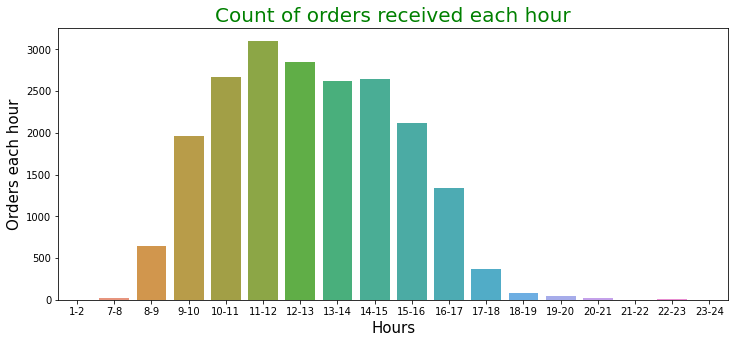

In [ ]:
hourTran = data.groupby('hour')['Transaction'].count().reset_index()
hourTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "hour", y = "Transaction")
plt.xlabel('Hours', size = 15)
plt.ylabel('Orders each hour', size = 15)
plt.title('Count of orders received each hour', color = 'green', size = 20)
plt.show()

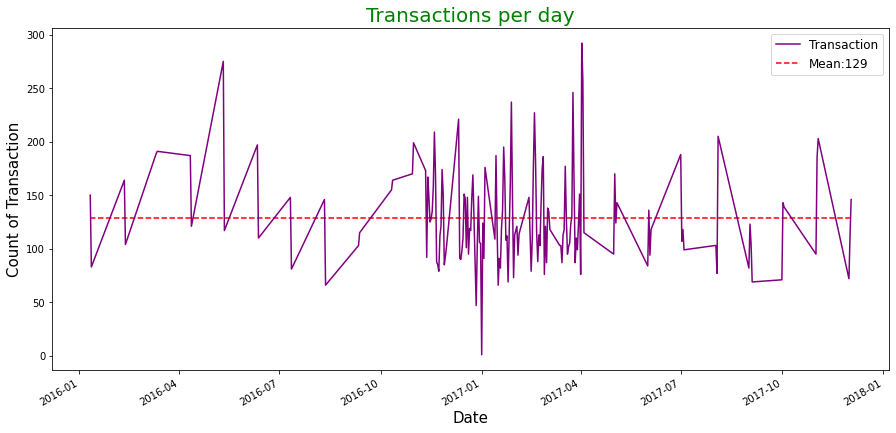

In [ ]:
data.groupby('date')['Transaction'].count().plot(kind="line",figsize=(15,7),color='purple')
plt.xlabel('Date', size = 15)
plt.ylabel('Count of Transaction', size = 15)
plt.hlines(y = 129, color='red', xmin=data['date'].min(), xmax=data['date'].max(),
           linestyles='dashed', label='Mean:129')
plt.title('Transactions per day',  color = 'green', size = 20)
plt.legend(fontsize='large')
plt.show()

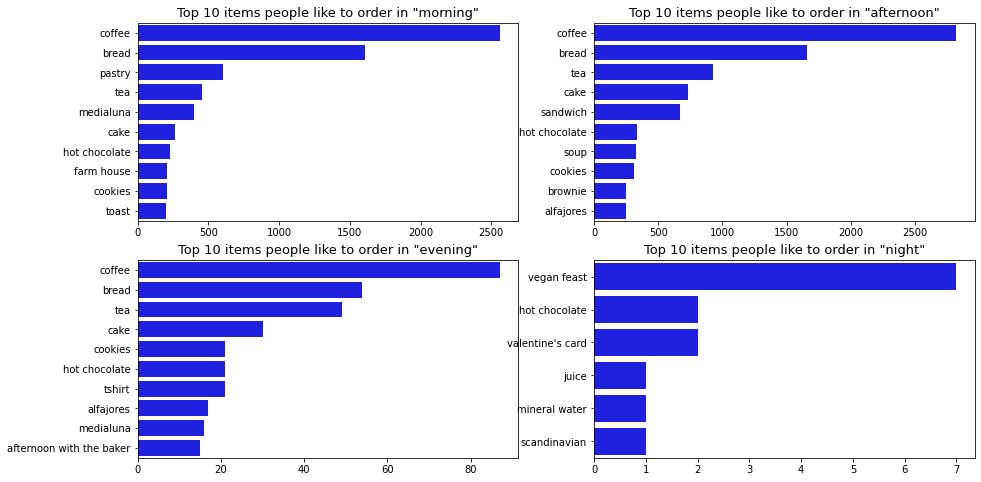

In [ ]:
df = data.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = df[df.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction, color='blue')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()



#Associastion Rules mining using Apriori algorithm

In [ ]:
df = data.groupby(['Transaction','Item'])['Item'].count().reset_index(name='Count')
df

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [ ]:
my_basket = df.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
my_basket.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,bowl nic pitt,bread,bread pudding,brioche and salami,brownie,cake,caramel bites,cherry me dried fruit,chicken sand,chicken stew,chimichurri oil,chocolates,christmas common,coffee,coffee granules,coke,cookies,crepes,crisps,drinking chocolate spoons,duck egg,dulce de leche,eggs,ella's kitchen pouches,empanadas,extra salami or feta,fairy doors,farm house,focaccia,frittata,...,lemon and coconut,medialuna,mighty protein,mineral water,mortimer,muesli,muffin,my-5 fruit shoot,nomad bag,olum & polenta,panatone,pastry,pick and mix bowls,pintxos,polenta,postcard,raspberry shortbread sandwich,raw bars,salad,sandwich,scandinavian,scone,siblings,smoothies,soup,spanish brunch,spread,tacos/fajita,tartine,tea,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,bowl nic pitt,bread,bread pudding,brioche and salami,brownie,cake,caramel bites,cherry me dried fruit,chicken sand,chicken stew,chimichurri oil,chocolates,christmas common,coffee,coffee granules,coke,cookies,crepes,crisps,drinking chocolate spoons,duck egg,dulce de leche,eggs,ella's kitchen pouches,empanadas,extra salami or feta,fairy doors,farm house,focaccia,frittata,...,lemon and coconut,medialuna,mighty protein,mineral water,mortimer,muesli,muffin,my-5 fruit shoot,nomad bag,olum & polenta,panatone,pastry,pick and mix bowls,pintxos,polenta,postcard,raspberry shortbread sandwich,raw bars,salad,sandwich,scandinavian,scone,siblings,smoothies,soup,spanish brunch,spread,tacos/fajita,tartine,tea,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets = apriori(my_basket_sets, min_support = 0.01, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(coffee, toast)"
57,0.014369,"(sandwich, tea)"
58,0.010037,"(cake, coffee, bread)"
59,0.011199,"(pastry, coffee, bread)"


In [ ]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648


In [ ]:
rules.sort_values('lift',ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
